In [26]:
from sklearn import model_selection
import pandas as pd
import numpy as np

# 데이터 로드
data_url = "~/data/data/bike-sharing-demand/train.csv"
df = pd.read_csv(data_url)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [30]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['min'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

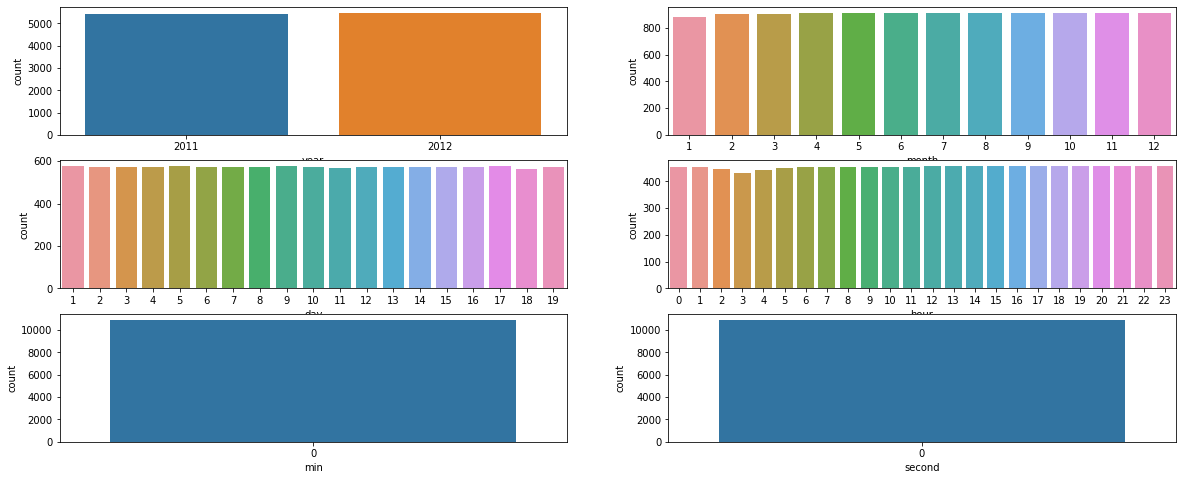

In [38]:
import seaborn as sns

plt.figure(figsize=(20, 8))

plt.subplot(3, 2, 1)
sns.countplot(data=df, x='year')
plt.subplot(3, 2, 2)
sns.countplot(data=df, x='month')
plt.subplot(3, 2, 3)
sns.countplot(data=df, x='day')
plt.subplot(3, 2, 4)
sns.countplot(data=df, x='hour')
plt.subplot(3, 2, 5)
sns.countplot(data=df, x='min')
plt.subplot(3, 2, 6)
sns.countplot(data=df, x='second')
plt.show()

In [39]:
df.drop(['datetime', 'year', 'day', 'min', 'second', 'season', 'temp', 'casual', 'humidity', 'registered', 'count'], axis=1)

,holiday,workingday,weather,atemp,humidity,windspeed,count,month,hour
0,0,0,1,14.395,81,0.0000,16,1,0
1,0,0,1,13.635,80,0.0000,40,1,1
2,0,0,1,13.635,80,0.0000,32,1,2
3,0,0,1,14.395,75,0.0000,13,1,3
4,0,0,1,14.395,75,0.0000,1,1,4
...,...,...,...,...,...,...,...,...,...
10881,0,1,1,19.695,50,26.0027,336,12,19
10882,0,1,1,17.425,57,15.0013,241,12,20
10883,0,1,1,15.910,61,15.0013,168,12,21
10884,0,1,1,17.425,61,6.0032,129,12,22


In [60]:
x = df[['month', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'hour']].to_numpy()
y = df['count'].to_numpy()

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
predictions = model.predict(X_test)
predictions

array([287.73494418,   4.41126929, 243.38482918, ..., 268.38310208,
        -5.01578513, 206.5236416 ])

In [76]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, predictions) ** 0.5
rmse

147.24277442871417

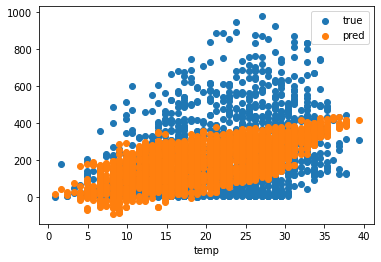

In [74]:
plt.scatter(X_test[:, 3], y_test, label="true")
plt.scatter(X_test[:, 3], predictions, label="pred")
plt.xlabel('temp')
plt.legend()
plt.show()

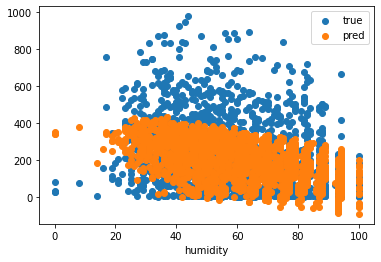

In [73]:
plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], predictions, label="pred")
plt.xlabel('humidity')
plt.legend()
plt.show()